In [55]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import pprint as pprint
import numpy as np
import scipy.stats as stats

In [2]:
# Read in CSVs

filepath = "core/Batting.csv"
filepath2 = "core/Appearances.csv"
filepath3 = "core/Teams.csv"
filepath4 = "core/doWar.csv"
filepath5 = "core/apWar.csv"
filepath6 = "core/arWar.csv"
filepath7 = "core/mtWar.csv"
filepath8 = "core/jhWar.csv"

battingRaw = pd.read_csv(filepath)
appearRaw = pd.read_csv(filepath2)
teamsRaw = pd.read_csv(filepath3)
dowarRaw = pd.read_csv(filepath4)
apwarRaw = pd.read_csv(filepath5)
arwarRaw = pd.read_csv(filepath6)
mtwarRaw = pd.read_csv(filepath7)
jhwarRaw = pd.read_csv(filepath8)

In [3]:
# Limit year to 2000 to 2016 and filter columns

batting = battingRaw[(battingRaw['yearID'] >= 2000) & (battingRaw['yearID'] <= 2016)]
appear = appearRaw[(appearRaw['yearID'] >= 2000) & (appearRaw['yearID'] <= 2016)]
teams_all = teamsRaw[(teamsRaw['yearID'] >= 2000) & (teamsRaw['yearID'] <= 2016)]

bat = batting[['playerID', 'yearID', 'AB', 'BB', 'SF', 'SH', 'HBP']]
app = appear[['yearID', 'teamID', 'playerID', 'G_all']]
teams = teams_all[['yearID', 'teamID', 'G', 'W', 'L']]

In [4]:
# Pull players needed (David Ortiz, Albert Pujols, Alex Rodriguez, Miguel Tejada, Josh Hamilton)

batOrtiz = bat[(bat.playerID == "ortizda01")]
batPujols = bat[(bat.playerID == "pujolal01")] 
batRod = bat[(bat.playerID == "rodrial01")]
batTej = bat[(bat.playerID == "tejadmi01")]
batHam = bat[(bat.playerID == "hamiljo03")]

appOrtiz = app[(app.playerID == "ortizda01")]
appPujols = app[(app.playerID == "pujolal01")] 
appRod = app[(app.playerID == "rodrial01")]
appTej = app[(app.playerID == "tejadmi01")]
appHam = app[(app.playerID == "hamiljo03")]


In [5]:
# Calculate AP and add to dataframe

doAP = batOrtiz['AB'] + batOrtiz['BB'] + batOrtiz['SF'] + batOrtiz['SH'] + batOrtiz['HBP']
batOrtiz['AP'] = doAP

apAP = batPujols['AB'] + batPujols['BB'] + batPujols['SF'] + batPujols['SH'] + batPujols['HBP']
batPujols['AP'] = apAP

arAP = batRod['AB'] + batRod['BB'] + batRod['SF'] + batRod['SH'] + batRod['HBP']
batRod['AP'] = arAP

mtAP = batTej['AB'] + batTej['BB'] + batTej['SF'] + batTej['SH'] + batTej['HBP']
batTej['AP'] = mtAP

jhAP = batHam['AB'] + batHam['BB'] + batHam['SF'] + batHam['SH'] + batHam['HBP']
batHam['AP'] = jhAP


/var/folders/6m/cq811jws6_76rhtzmz7w7m9c0000gn/T/ipykernel_1299/393378215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batOrtiz['AP'] = doAP
/var/folders/6m/cq811jws6_76rhtzmz7w7m9c0000gn/T/ipykernel_1299/393378215.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batPujols['AP'] = apAP
/var/folders/6m/cq811jws6_76rhtzmz7w7m9c0000gn/T/ipykernel_1299/393378215.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [6]:
# Combine appearance and batting DataFrames 

dortiz = appOrtiz.merge(batOrtiz, how = 'inner')
apujols = appPujols.merge(batPujols, how = 'inner')
arod = appRod.merge(batRod, how = 'inner')
mtej = appTej.merge(batTej, how = 'inner')
jham = appHam.merge(batHam, how = 'inner')

In [7]:
pl_team = teams.loc[(teams.teamID == "NYA") & (teams.teamID == "MIN") & (teams.teamID == "BOS") & (teams.teamID == "SLN") & (teams.teamID == "LAA") & (teams.teamID == "SEA") & (teams.teamID == "TEX") & (teams.teamID == "OAK") & (teams.teamID == "BAL") & (teams.teamID == "HOU") & (teams.teamID == "SDN") & (teams.teamID == "SFN") & (teams.teamID == "KCA") & (teams.teamID == "CIN")]

pl_team

,yearID,teamID,G,W,L


In [8]:
# Pull team data for calculating win %

nya = teams[(teams.teamID == "NYA")]
min_team = teams[(teams.teamID == "MIN")]
bos = teams[(teams.teamID == "BOS")]
sln = teams[(teams.teamID == "SLN")]
laa = teams[(teams.teamID == "LAA")]
sea = teams[(teams.teamID == "SEA")]
tex = teams[(teams.teamID == "TEX")]
oak = teams[(teams.teamID == "OAK")]
bal = teams[(teams.teamID == "BAL")]
hou = teams[(teams.teamID == "HOU")]
sdn = teams[(teams.teamID == "SDN")]
sfn = teams[(teams.teamID == "SFN")]
kca = teams[(teams.teamID == "KCA")]
cin = teams[(teams.teamID == "CIN")]


In [65]:
# Calculate and add Win % to dataframe per team

bos_win = ((bos['W']/(bos['G']))*100).round(2)
bos['Win%'] = bos_win
bos2 = bos[['yearID', 'teamID', 'G', 'Win%']]

nya_win = ((nya['W']/(nya['G']))*100).round(2)
nya['Win%'] = nya_win
nya2 = nya[['yearID', 'teamID', 'G', 'Win%']]

min_team_win = ((min_team['W']/(min_team['G']))*100).round(2)
min_team['Win%'] = min_team_win
min_team2 = min_team[['yearID', 'teamID', 'G', 'Win%']]

sln_win = ((sln['W']/(sln['G']))*100).round(2)
sln['Win%'] = sln_win
sln2 = sln[['yearID', 'teamID', 'G', 'Win%']]

laa_win = ((laa['W']/(laa['G']))*100).round(2)
laa['Win%'] = laa_win
laa2 = laa[['yearID', 'teamID', 'G', 'Win%']]

sea_win = ((sea['W']/(sea['G']))*100).round(2)
sea['Win%'] = sea_win
sea2 = sea[['yearID', 'teamID', 'G', 'Win%']]

tex_win = ((tex['W']/(tex['G']))*100).round(2)
tex['Win%'] = tex_win
tex2 = tex[['yearID', 'teamID', 'G', 'Win%']]

oak_win = ((oak['W']/(oak['G']))*100).round(2)
oak['Win%'] = oak_win
oak2 = oak[['yearID', 'teamID', 'G', 'Win%']]

bal_win = ((bal['W']/(bal['G']))*100).round(2)
bal['Win%'] = bal_win
bal2 = bal[['yearID', 'teamID', 'G', 'Win%']]

hou_win = ((hou['W']/(hou['G']))*100).round(2)
hou['Win%'] = hou_win
hou2 = hou[['yearID', 'teamID', 'G', 'Win%']]

sdn_win = ((sdn['W']/(sdn['G']))*100).round(2)
sdn['Win%'] = sdn_win
sdn2 = sdn[['yearID', 'teamID', 'G', 'Win%']]

sfn_win = ((sfn['W']/(sfn['G']))*100).round(2)
sfn['Win%'] = sfn_win
sfn2 = sfn[['yearID', 'teamID', 'G', 'Win%']]

kca_win = ((kca['W']/(kca['G']))*100).round(2)
kca['Win%'] = kca_win
kca2 = kca[['yearID', 'teamID', 'G', 'Win%']]

cin_win = ((cin['W']/(cin['G']))*100).round(2)
cin['Win%'] = cin_win
cin2 = cin[['yearID', 'teamID', 'G', 'Win%']]

/var/folders/6m/cq811jws6_76rhtzmz7w7m9c0000gn/T/ipykernel_1299/2009356711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bos['Win%'] = bos_win
/var/folders/6m/cq811jws6_76rhtzmz7w7m9c0000gn/T/ipykernel_1299/2009356711.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nya['Win%'] = nya_win
/var/folders/6m/cq811jws6_76rhtzmz7w7m9c0000gn/T/ipykernel_1299/2009356711.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [61]:
# Pull WAR data from CSV, reduce time frame, rename column name, and print new dataframe

dowarring = dowarRaw.loc[(dowarRaw['Year'] >= 2000) & (dowarRaw['Year'] <= 2016)]
dowarring['yearID'] = dowarring['Year']
dOrtiz = dowarring[['yearID', 'Tm', 'WAR']]

apwarring = apwarRaw.loc[(apwarRaw['Year'] >= 2000) & (apwarRaw['Year'] <= 2016)]
apwarring['yearID'] = apwarring['Year']
aPujols = apwarring[['yearID', 'Tm', 'WAR']]

arwarring = arwarRaw.loc[(arwarRaw['Year'] >= 2000) & (arwarRaw['Year'] <= 2016)]
arwarring['yearID'] = arwarring['Year']
aRod = arwarring[['yearID', 'Tm', 'WAR']]

mtwarring = mtwarRaw.loc[(mtwarRaw['Year'] >= 2000) & (mtwarRaw['Year'] <= 2016)]
mtwarring['yearID'] = mtwarring['Year']
mTej = mtwarring[['yearID', 'Tm', 'WAR']]

jhwarring = jhwarRaw.loc[(jhwarRaw['Year'] >= 2000) & (jhwarRaw['Year'] <= 2016)]
jhwarring['yearID'] = jhwarring['Year']
jHam = jhwarring.loc[()'yearID', 'Tm', 'WAR']]


/var/folders/6m/cq811jws6_76rhtzmz7w7m9c0000gn/T/ipykernel_1299/1937177526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dowarring['yearID'] = dowarring['Year']
/var/folders/6m/cq811jws6_76rhtzmz7w7m9c0000gn/T/ipykernel_1299/1937177526.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apwarring['yearID'] = apwarring['Year']
/var/folders/6m/cq811jws6_76rhtzmz7w7m9c0000gn/T/ipykernel_1299/1937177526.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [11]:
# Merge team dataframes per player

# David Ortiz
dortiz_min_team = dortiz.merge(min_team, how = 'inner')
dortiz_min_team2 = dortiz_min_team[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
dortiz_min_team3 = dortiz_min_team2.merge(dOrtiz, how = 'inner')
dOrtiz_min_team = dortiz_min_team3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]
dortiz_bos = dortiz.merge(bos, how = 'inner')
dortiz_bos2 = dortiz_bos[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
dortiz_bos3 = dortiz_bos2.merge(dOrtiz, how = 'inner')
dOrtiz_bos = dortiz_bos3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]

# Albert Pujols
apujols_sln = apujols.merge(sln, how = 'inner')
apujols_sln2 = apujols_sln[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
apujols_sln3 = apujols_sln2.merge(aPujols, how = 'inner')
aPujols_sln = apujols_sln3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]
apujols_laa = apujols.merge(laa, how = 'inner')
apujols_laa2 = apujols_laa[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
apujols_laa3 = apujols_laa2.merge(aPujols, how = 'inner')
aPujols_laa = apujols_laa3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]

# Alex Rodriguez
arod_sea = arod.merge(sea, how = 'inner')
arod_sea2 = arod_sea[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
arod_sea3 = arod_sea2.merge(aRod, how = 'inner')
aRod_sea = arod_sea3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]
arod_tex = arod.merge(tex, how = 'inner')
arod_tex2 = arod_tex[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
arod_tex3 = arod_tex2.merge(aRod, how = 'inner')
aRod_tex = arod_tex3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]
arod_nya = arod.merge(nya, how = 'inner')
arod_nya2 = arod_nya[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
arod_nya3 = arod_nya2.merge(aRod, how = 'inner')
aRod_nya = arod_nya3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]

# Miguel Tejada
mtej_oak = mtej.merge(oak, how = 'inner')
mtej_oak2 = mtej_oak[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
mtej_oak3 = mtej_oak2.merge(mTej, how = 'inner')
mTej_oak = mtej_oak3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]
mtej_bal = mtej.merge(bal, how = 'inner')
mtej_bal2 = mtej_bal[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
mtej_bal3 = mtej_bal2.merge(mTej, how = 'inner')
mTej_bal = mtej_bal3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]
mtej_hou = mtej.merge(hou, how = 'inner')
mtej_hou2 = mtej_hou[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
mtej_hou3 = mtej_hou2.merge(mTej, how = 'inner')
mTej_hou = mtej_hou3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]
mtej_sdn = mtej.merge(sdn, how = 'inner')
mtej_sdn2 = mtej_sdn[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
mtej_sdn3 = mtej_sdn2.merge(mTej, how = 'inner')
mTej_sdn = mtej_sdn3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]
mtej_sfn = mtej.merge(sfn, how = 'inner')
mtej_sfn2 = mtej_sfn[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
mtej_sfn3 = mtej_sfn2.merge(mTej, how = 'inner')
mTej_sfn = mtej_sfn3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]
mtej_kca = mtej.merge(kca, how = 'inner')
mtej_kca2 = mtej_kca[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
mtej_kca3 = mtej_kca2.merge(mTej, how = 'inner')
mTej_kca = mtej_kca3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]

# Josh Hamilton
jham_cin = jham.merge(cin, how = 'inner')
jham_cin2 = jham_cin[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
jham_cin3 = jham_cin2.merge(jHam, how = 'inner')
jHam_cin = jham_cin3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]
jham_tex = jham.merge(tex, how = 'inner')
jham_tex2 = jham_tex[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
jham_tex3 = jham_tex2.merge(jHam, how = 'inner')
jHam_tex = jham_tex3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]
jham_laa = jham.merge(laa, how = 'inner')
jham_laa2 = jham_laa[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP']]
jham_laa3 = jham_laa2.merge(jHam, how = 'inner')
jHam_laa = jham_laa3[['yearID', 'teamID', 'G', 'Win%','playerID', 'G_all', 'AP', 'WAR']]

In [128]:
# Merge DataFrames of teams to be under player

JHam = pd.concat([jHam_laa, jHam_tex], axis = 0).sort_values('yearID', ascending= True)
MTej = pd.concat([mTej_oak, mTej_bal, mTej_hou, mTej_sdn, mTej_sfn, mTej_kca], axis = 0).sort_values('yearID', ascending= True)
ARod = pd.concat([aRod_sea, aRod_tex, aRod_nya], axis = 0).sort_values('yearID', ascending= True)
APujols = pd.concat([aPujols_sln, aPujols_laa], axis = 0).sort_values('yearID', ascending= True)
DOrtiz = pd.concat([dOrtiz_min_team, dOrtiz_bos], axis = 0).sort_values('yearID', ascending= True)

display(JHam)

,yearID,teamID,G,Win%,playerID,G_all,AP,WAR
0,2008,TEX,162,48.77,hamiljo03,156,704.0,5.5
1,2009,TEX,162,53.70,hamiljo03,89,365.0,0.6
2,2010,TEX,162,55.56,hamiljo03,133,571.0,8.7
3,2011,TEX,162,59.26,hamiljo03,121,538.0,3.8
4,2012,TEX,162,57.41,hamiljo03,148,636.0,4.0
0,2013,LAA,162,48.15,hamiljo03,151,636.0,1.3
1,2014,LAA,162,60.49,hamiljo03,89,381.0,1.4
5,2015,TEX,162,54.32,hamiljo03,50,182.0,0.5


In [129]:
display(MTej)

,yearID,teamID,G,Win%,playerID,G_all,AP,WAR
0,2000,OAK,161,56.52,tejadmi01,160,681.0,4.2
1,2001,OAK,162,62.96,tejadmi01,162,683.0,4.2
2,2002,OAK,162,63.58,tejadmi01,162,715.0,5.7
3,2003,OAK,162,59.26,tejadmi01,162,703.0,4.9
0,2004,BAL,162,48.15,tejadmi01,162,725.0,7.4
1,2005,BAL,162,45.68,tejadmi01,162,704.0,5.9
2,2006,BAL,162,43.21,tejadmi01,162,709.0,4.5
3,2007,BAL,162,42.59,tejadmi01,133,568.0,2.3
0,2008,HOU,161,53.42,tejadmi01,158,666.0,1.9
1,2009,HOU,162,45.68,tejadmi01,158,673.0,1.9


In [130]:
display(ARod)

,yearID,teamID,G,Win%,playerID,G_all,AP,WAR
0,2000,SEA,162,56.17,rodrial01,148,672.0,10.4
0,2001,TEX,162,45.06,rodrial01,162,732.0,8.3
1,2002,TEX,162,44.44,rodrial01,162,725.0,8.8
2,2003,TEX,162,43.83,rodrial01,161,715.0,8.4
0,2004,NYA,162,62.35,rodrial01,155,698.0,7.6
1,2005,NYA,162,58.64,rodrial01,162,715.0,9.4
2,2006,NYA,162,59.88,rodrial01,154,674.0,4.5
3,2007,NYA,162,58.02,rodrial01,158,708.0,9.4
4,2008,NYA,162,54.94,rodrial01,138,594.0,6.8
5,2009,NYA,162,63.58,rodrial01,124,535.0,4.2


In [131]:
display(APujols)

,yearID,teamID,G,Win%,playerID,G_all,AP,WAR
0,2001,SLN,162,57.41,pujolal01,161,676.0,6.6
1,2002,SLN,162,59.88,pujolal01,157,675.0,5.5
2,2003,SLN,162,52.47,pujolal01,157,685.0,8.7
3,2004,SLN,162,64.81,pujolal01,154,692.0,8.5
4,2005,SLN,162,61.73,pujolal01,161,700.0,8.4
5,2006,SLN,161,51.55,pujolal01,143,634.0,8.5
6,2007,SLN,162,48.15,pujolal01,158,679.0,8.7
7,2008,SLN,162,53.09,pujolal01,148,641.0,9.2
8,2009,SLN,162,56.17,pujolal01,160,700.0,9.7
9,2010,SLN,162,53.09,pujolal01,159,700.0,7.5


In [132]:
display(DOrtiz)

,yearID,teamID,G,Win%,playerID,G_all,AP,WAR
0,2000,MIN,162,42.59,ortizda01,130,478.0,0.7
1,2001,MIN,162,52.47,ortizda01,89,347.0,0.3
2,2002,MIN,161,58.39,ortizda01,125,466.0,1.3
0,2003,BOS,162,58.64,ortizda01,128,509.0,3.4
1,2004,BOS,162,60.49,ortizda01,150,669.0,4.3
2,2005,BOS,162,58.64,ortizda01,159,713.0,5.2
3,2006,BOS,162,53.09,ortizda01,151,686.0,5.8
4,2007,BOS,162,59.26,ortizda01,149,667.0,6.4
5,2008,BOS,162,58.64,ortizda01,109,491.0,1.7
6,2009,BOS,162,58.64,ortizda01,150,627.0,0.7


<Figure size 1440x2160 with 0 Axes>

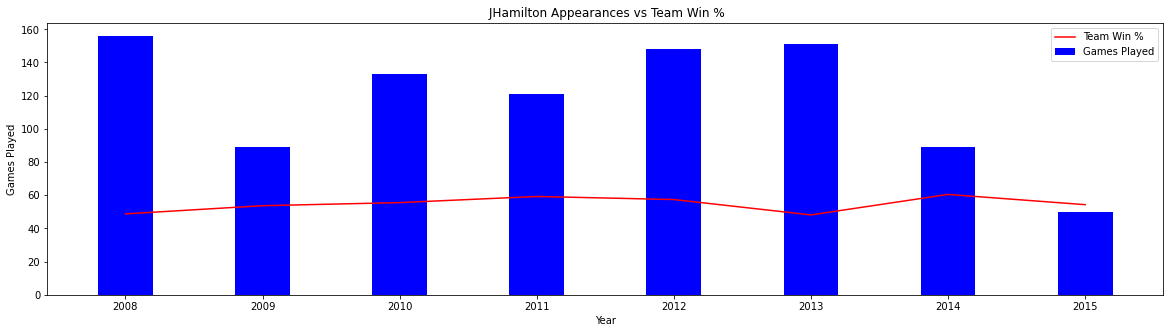

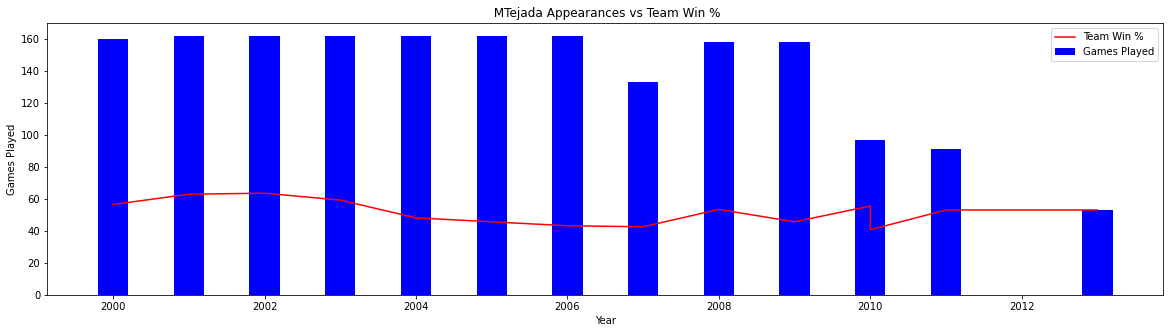

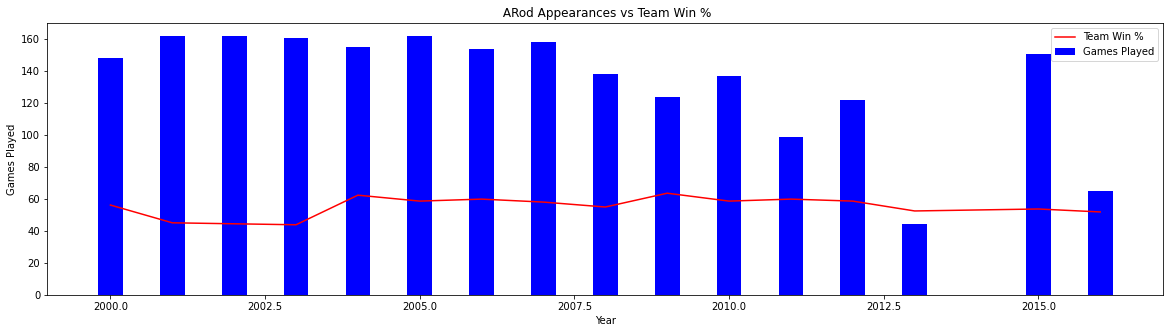

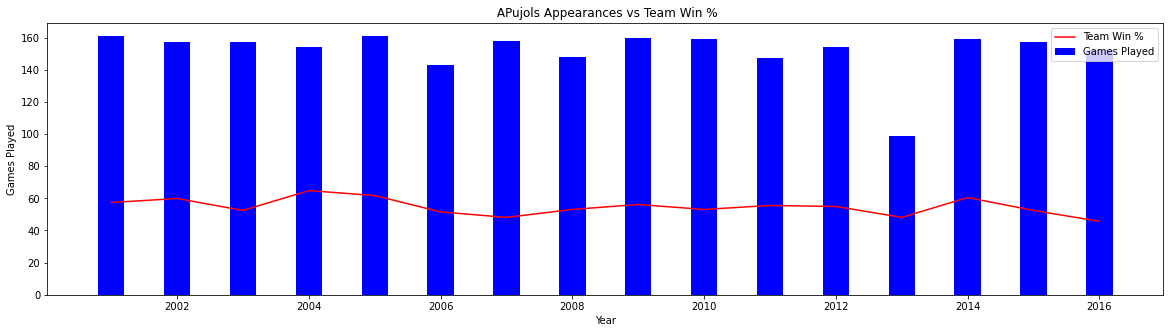

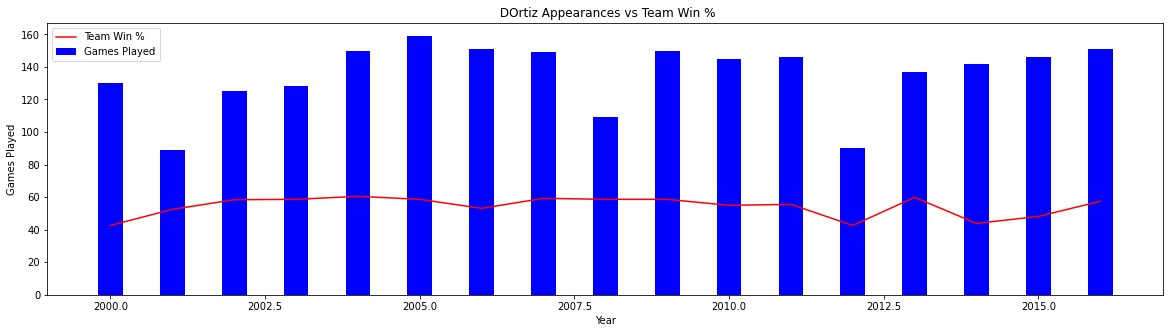

In [126]:
# Graph Games played vs Team Win%

Player = [JHam, MTej, ARod, APujols, DOrtiz]
names = ['JHamilton', 'MTejada', 'ARod', 'APujols', 'DOrtiz']

for p, t in zip(Player, names):
    y = p['G_all']
    x = p['yearID']
    z = p['Win%']
    
    plt.figure(figsize=(20,5))
    plt.bar(x, y, color = 'blue',width = 0.4)
    plt.plot(x, z, color = 'red')
    plt.xlabel('Year')
    plt.ylabel('Games Played')
    plt.legend(['Team Win %', 'Games Played'])
    plt.title(f" {t} Appearances vs Team Win %")
    
    plt.savefig(f"{t} Appearances vs Team Win.png")
        
    plt.show()

In [134]:
# https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax


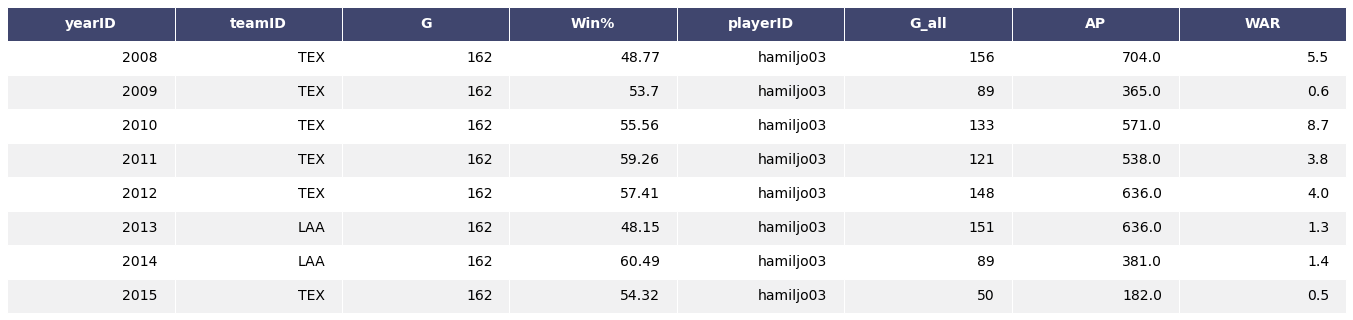

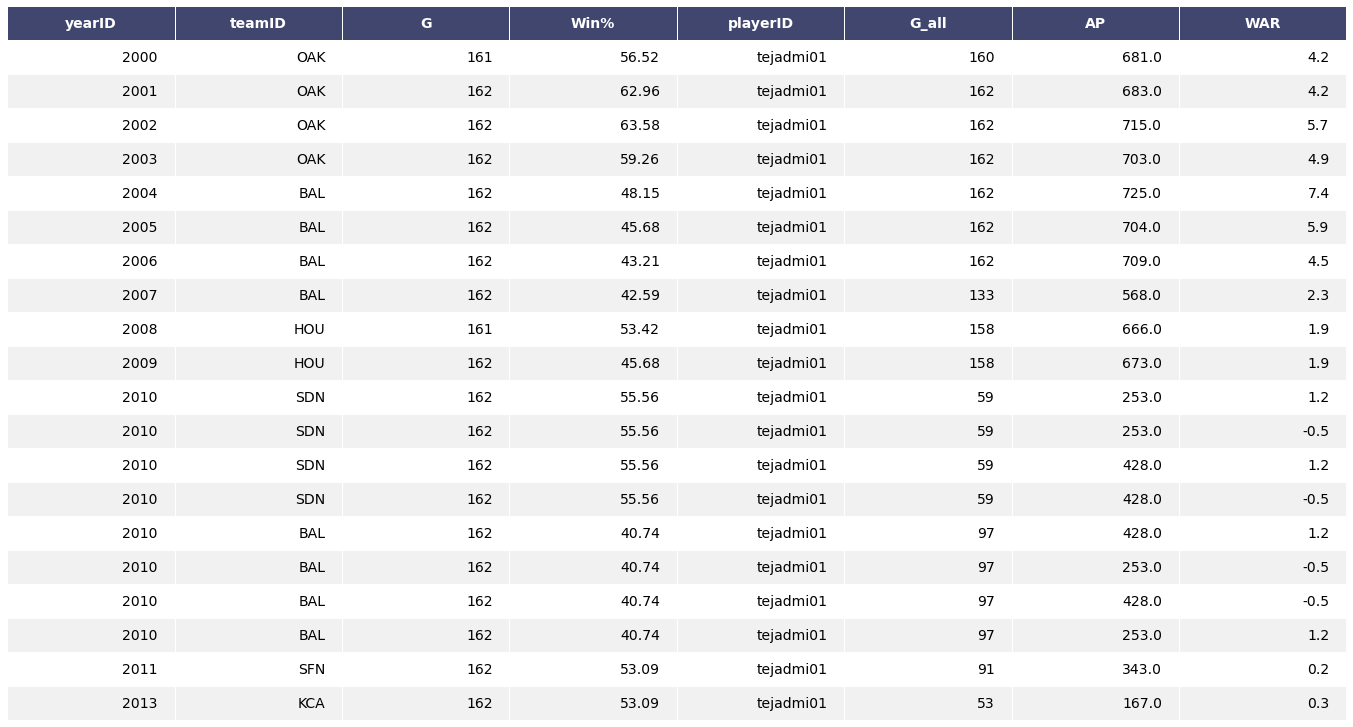

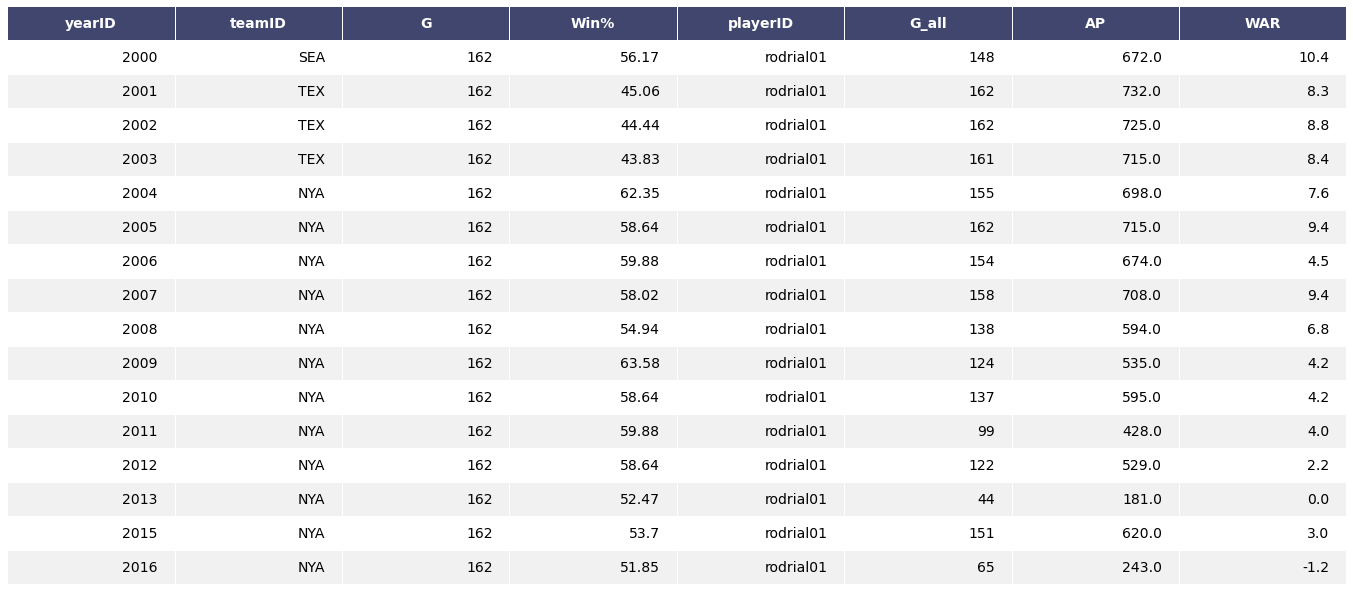

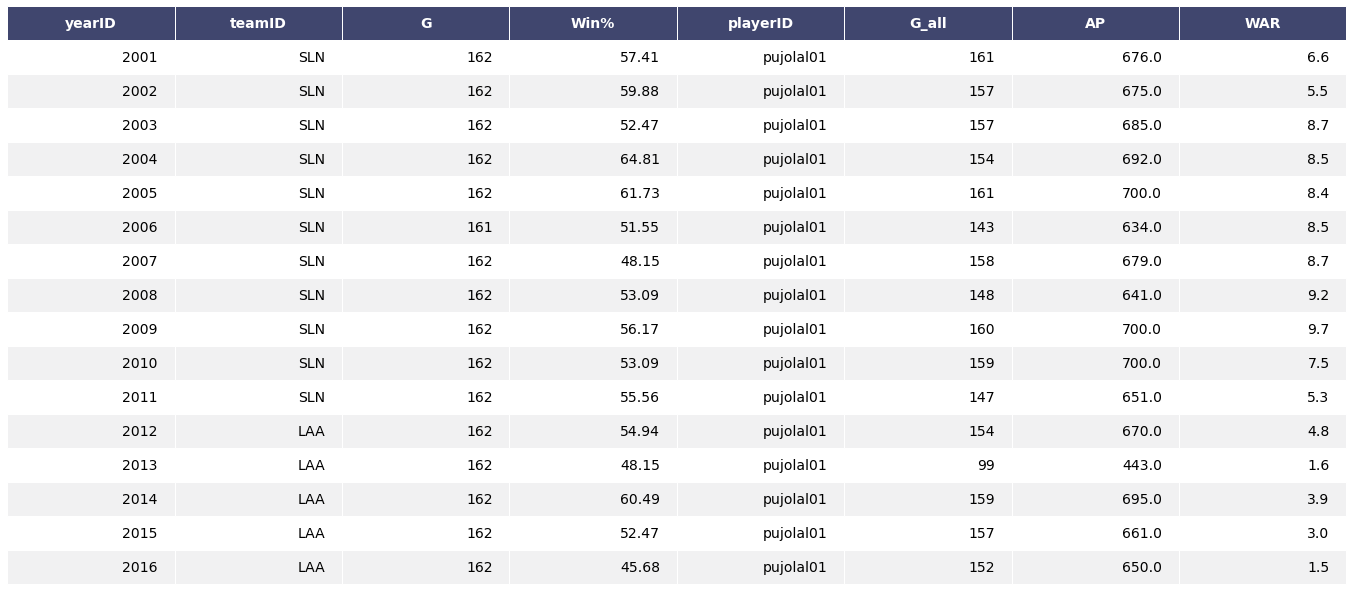

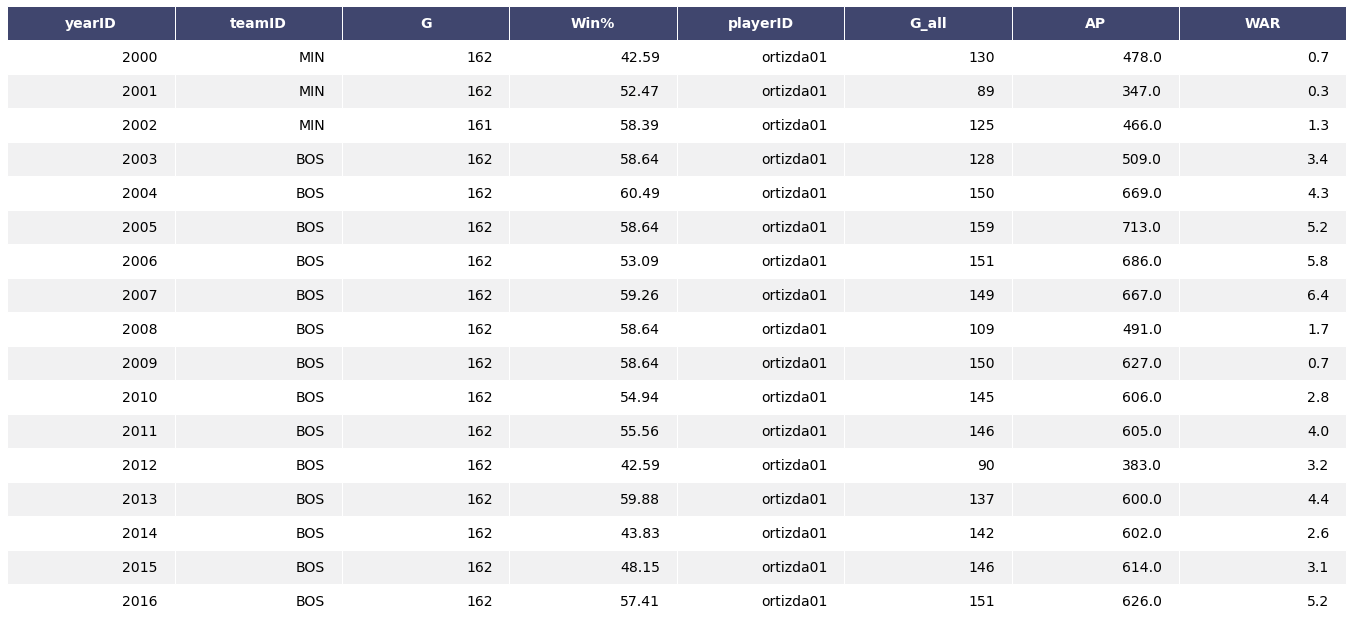

In [138]:
for p, t in zip(Player, names):
    fig,ax = render_mpl_table(p)
    fig.savefig(f'{t}table.png')